In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop = set(stopwords.words('english'))
import scikitplot as skplt
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding, LSTM, SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mirji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mirji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
print("Rows: {} \t Columns: {} \t Training Data".format(train_data.shape[0],train_data.shape[1]))
print("Rows: {} \t Columns: {} \t Test Data".format(test_data.shape[0],test_data.shape[1]))

Rows: 7613 	 Columns: 5 	 Training Data
Rows: 3263 	 Columns: 4 	 Test Data


### Target Variable Distribution

Text(0, 0.5, 'Samples')

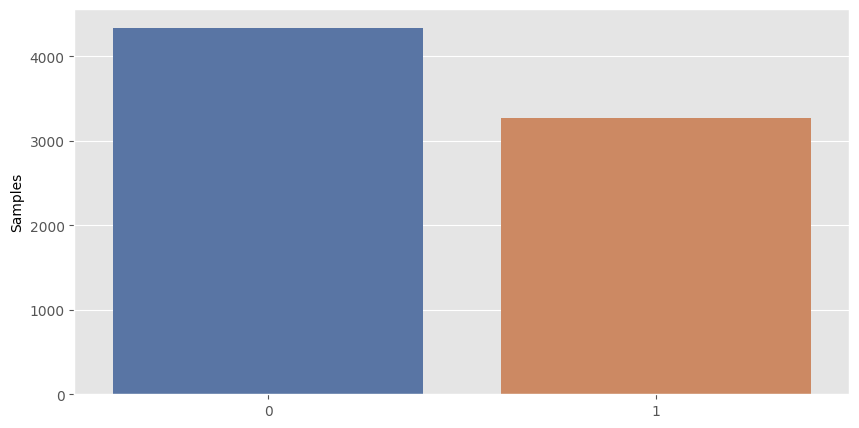

In [6]:
counts = train_data.target.value_counts()
palette = sns.color_palette("deep")
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, palette=palette, ax=ax).set_ylabel('Samples')


### Analysis of tweets

Number of Characters in a tweet

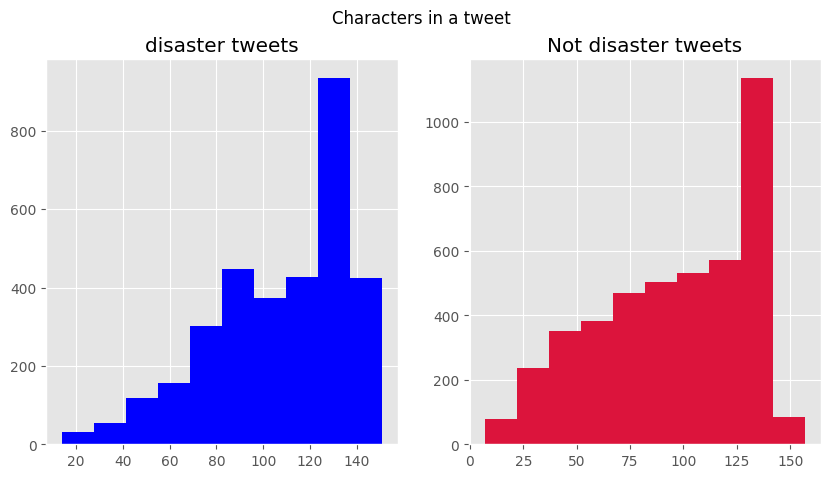

In [7]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len = train_data[train_data['target'] == 1]['text'].str.len()
ax1.hist(tweet_len, color = 'blue')
ax1.set_title('disaster tweets')
tweet_len = train_data[train_data['target'] == 0]['text'].str.len()
ax2.hist(tweet_len, color = 'crimson')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in a tweet')
plt.show()

Number of words in a tweet

C:\Users\mirji\AppData\Local\Temp\ipykernel_13804\1674144628.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


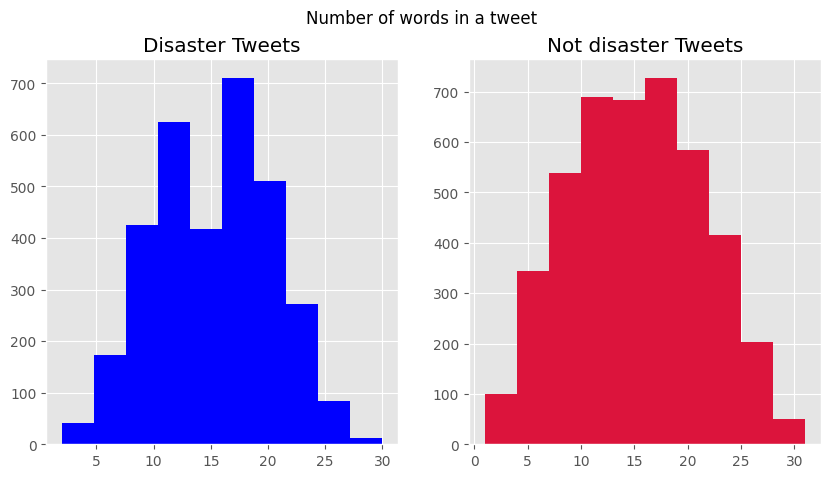

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len = train_data[train_data['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='blue')
ax1.set_title('Disaster Tweets')
tweet_len = train_data[train_data['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='crimson')
ax2.set_title('Not disaster Tweets')
fig.suptitle('Number of words in a tweet')
fig.show()

Average word length of each tweet

C:\Users\mirji\AppData\Local\Temp\ipykernel_13804\1203271469.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
C:\Users\mirji\AppData\Local\Temp\ipykernel_13804\1203271469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: 

Text(0.5, 0.98, 'Average word length in each tweet')

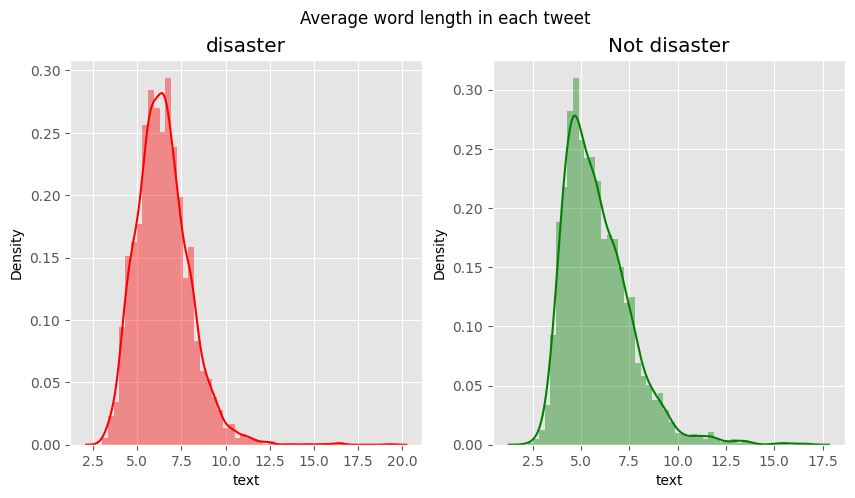

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_data[train_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_data[train_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

Most common words in target (1 & 0)

In [10]:
from collections import Counter
words = train_data[train_data.target == 0].text.apply(lambda x : [word.lower() for word in x.split()])
h_words = Counter()
for text_ in words:
    h_words.update(text_)

print(h_words.most_common(50))

[('the', 1877), ('a', 1238), ('to', 1181), ('i', 1052), ('and', 911), ('of', 895), ('in', 805), ('you', 625), ('is', 586), ('my', 541), ('for', 486), ('on', 424), ('with', 374), ('-', 374), ('that', 357), ('it', 341), ('this', 286), ('be', 284), ('like', 250), ('have', 240), ('by', 240), ('so', 235), ('are', 231), ('at', 229), ('just', 229), ('your', 225), ('me', 221), ('was', 216), ('but', 216), ('not', 198), ("i'm", 195), ('&amp;', 190), ('??', 183), ('out', 179), ('up', 178), ('will', 177), ('if', 177), ('from', 177), ('all', 173), ('new', 163), ('get', 161), ('as', 160), ('or', 155), ('we', 148), ('when', 144), ('has', 143), ('he', 143), ('no', 140), ('about', 139), ('they', 133)]


In [11]:
words = train_data[train_data.target == 1].text.apply(lambda x:[word.lower() for word in x.split()])
h_words = Counter()
for text_ in words:
    h_words.update(text_)

print(h_words.most_common(50))

[('the', 1330), ('in', 1144), ('of', 919), ('a', 897), ('to', 753), ('and', 494), ('on', 410), ('for', 394), ('-', 389), ('is', 344), ('at', 303), ('i', 284), ('by', 274), ('from', 243), ('with', 188), ('that', 181), ('after', 181), ('this', 177), ('as', 167), ('are', 166), ('was', 165), ('it', 163), ('fire', 151), ('have', 140), ('my', 130), ('over', 123), ('you', 121), ('more', 121), ('via', 117), ('up', 114), ('an', 113), ('be', 112), ('...', 106), ('&amp;', 105), ('has', 104), ('suicide', 103), ('who', 100), ('no', 99), ('disaster', 97), ('but', 95), ('police', 94), ('people', 93), ('been', 93), ('when', 93), ('killed', 92), ('like', 91), ('not', 90), ('california', 88), ('than', 85), ('just', 84)]


Analysis of other variables 

1. Missing values - training and testing data have the same ratio of missing values in keyword and location

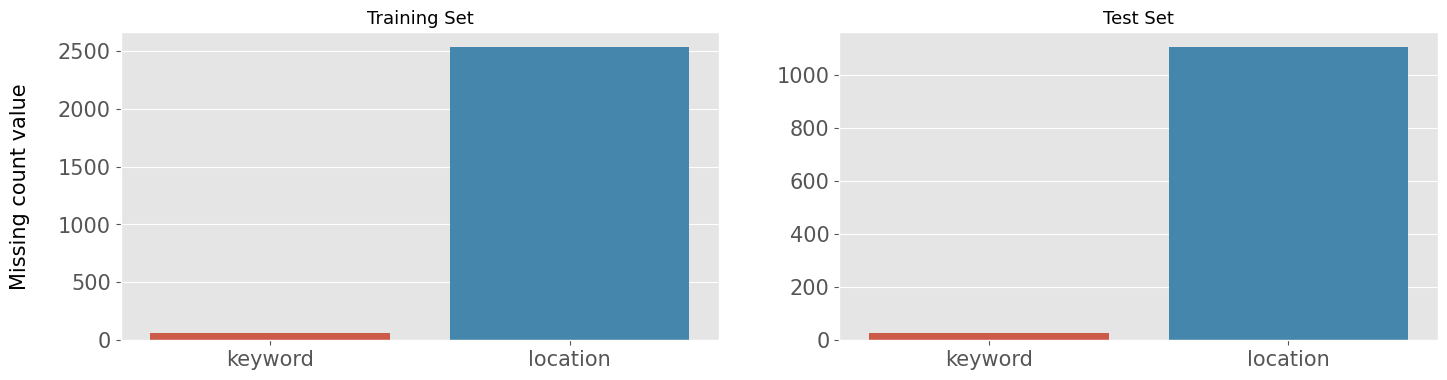

In [13]:
missing_cols = ['keyword','location']

fig, axes = plt.subplots(ncols = 2, figsize = (17,4), dpi = 100)

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y = train_data[missing_cols].isnull().sum().values, ax = axes[0])
sns.barplot(x=test_data[missing_cols].isnull().sum().index, y=test_data[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing count value',size = 15, labelpad = 20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)
plt.show()




In [14]:
for df in [train_data, test_data]:
    for col in ['keyword','location']:
        df[col] = df[col].fillna(f'no_{col}')

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3263 non-null   object
 2   location  3263 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


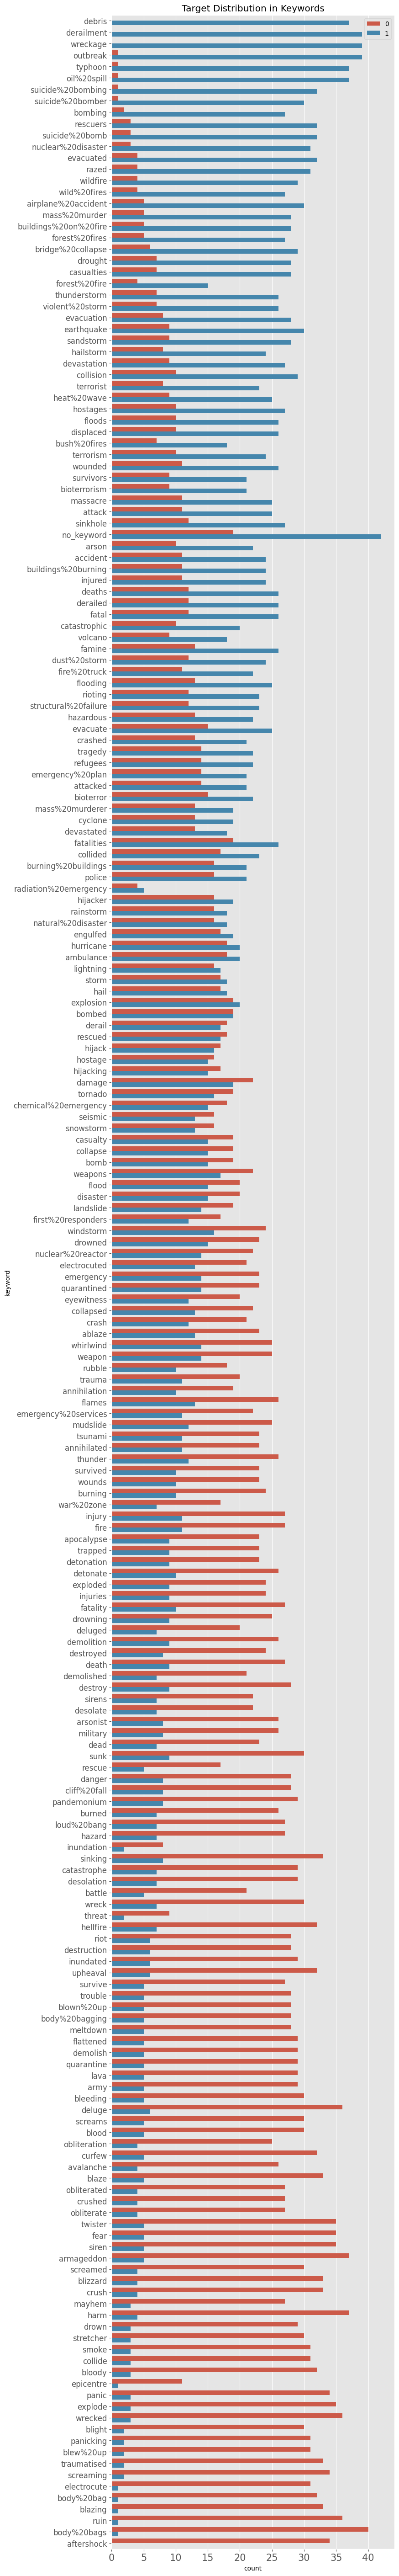

In [17]:
train_data['target_mean'] = train_data.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8,72), dpi=100)
sns.countplot(y = train_data.sort_values(by='target_mean', ascending=False)['keyword'], hue=train_data.sort_values(by='target_mean', ascending=False)['target'])
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()


In [18]:
train_data.drop(columns=['target_mean'], inplace=True)

Data cleaning

In [19]:
def clean_text(df, text_field, new_text_field_name):
    # Convert strings in the Series/Index to lowercase.
    df[new_text_field_name] = df[text_field].str.lower()

    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(
        lambda elem: re.sub(r"\d+", "", elem))
    # remove url
    df[new_text_field_name] = df[new_text_field_name].apply(
        lambda elem: re.sub(r"https?://\S+|www\.\S+", "", elem))
    # remove HTML tags
    df[new_text_field_name] = df[new_text_field_name].apply(
        lambda elem: re.sub(r"<.*?>", "", elem))
    # remove emojis
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"["
                                                                                u"\U0001F600-\U0001F64F"  # emoticons
                                                                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                                                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                                                                # flags (iOS)
                                                                                u"\U0001F1E0-\U0001F1FF"
                                                                                u"\U00002702-\U000027B0"
                                                                                u"\U000024C2-\U0001F251"
                                                                                "]+", "", elem))
    return df


data_clean = clean_text(train_data, 'text', 'text_clean')
data_clean_test = clean_text(test_data, 'text', 'text_clean')
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


Removing Stop Words

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...


Tokenizing the text

In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x)) 
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ..."


Lemmatization of the tokens

In [22]:
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquake, may, allah, forg..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resident, asked, 'shelter, place, ', notified..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, people, receive, #, wildfire, evacuation, ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ..."
